**OECD Well-Being Factors**

*Team Mitglieder:*
- Flurina Baumbach 
- Annabel Morgenstern 

*Intro zum Projekt*

In dieser Analyse beschäftigen wir uns mit Daten der OECD, die Aufschluss darüber geben sollen, wie es Menschen in verschiedenen Ländern geht und wie sich ihre Lebensqualität im Laufe der Zeit entwickelt.


Der Datensatz enthält Informationen zur Lebensqualität in verschiedenen Ländern. Er umfasst Bereiche wie Gesundheit, Bildung, Einkommen, Sicherheit, Umwelt und allgemeine Lebenszufriedenheit. Jede Zeile beschreibt ein Land, einen bestimmten Lebensqualitäts-Indikator, ein Jahr und den dazugehörigen Messwert. Damit lässt sich erkennen, wie gut oder schlecht Länder in bestimmten Lebensbereichen abschneiden und wie sich diese Werte über die Jahre verändern. Kurz gesagt: der Datensatz zeigt, wie sich Lebensqualität international unterscheidet und entwickelt.


**Vorlesung 1: Erste Datensichtung, Aufbereitung & Exploration**

*Veranschaulichung der Daten, Variablen verstehen, erste Statistiken & Visualisierungen*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# CSV-Datei laden und die ersten Zeilen anzeigen

df = pd.read_csv("OECD.WISE.WDP,DSD_HSL@DF_HSL_CWB,+all.csv")
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,MEASURE,Unnamed: 7,UNIT_MEASURE,Unnamed: 9,...,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27,BASE_PER,Unnamed: 29
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,NaN,7_1,NaN,PT_POP_Y_GE15_SUB,NaN,...,95.782784,NaN,A,NaN,0,NaN,2,NaN,NaN,NaN


In [ ]:
# Infos zum Datensatz anzeigen und erste Übersicht über Zahlenwerte

df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109706 entries, 0 to 109705
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   STRUCTURE       109706 non-null  object  
 1   STRUCTURE_ID    109706 non-null  object  
 2   STRUCTURE_NAME  0 non-null       float64 
 3   ACTION          109706 non-null  object  
 4   country         109706 non-null  category
 5   measure         109706 non-null  category
 6   unit            109706 non-null  category
 7   AGE             109706 non-null  object  
 8   SEX             109706 non-null  object  
 9   EDUCATION_LEV   109706 non-null  object  
 10  DOMAIN          109706 non-null  object  
 11  year            109706 non-null  int64   
 12  value           109706 non-null  float64 
 13  OBS_STATUS      109706 non-null  object  
 14  UNIT_MULT       109706 non-null  int64   
 15  DECIMALS        109706 non-null  int64   
 16  BASE_PER        1616 non-null    float

**Lecture 1 — Loading, Understanding & Exploring the Dataset**
*First Look, Data Types, Missing Values, Initial Plots*

In [ ]:
# Entfernung unnötiger Spalten, die beim CSV-Export entstanden sind (wie z.B. die unnamed Spalten)

df = df.drop(columns=[c for c in df.columns if "Unnamed" in c])
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,MEASURE,UNIT_MEASURE,AGE,SEX,EDUCATION_LEV,DOMAIN,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2006,95.782784,A,0,2,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2007,95.782784,A,0,2,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2008,95.782784,A,0,2,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2009,95.782784,A,0,2,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2010,95.782784,A,0,2,NaN


In [ ]:
# Wichtige Spalten umbenennen, damit sie leichter zu verstehen sind.

df = df.rename(columns={
    "REF_AREA":"country",
    "MEASURE":"measure",
    "UNIT_MEASURE":"unit",
    "TIME_PERIOD":"year",
    "OBS_VALUE":"value"
})
df.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,country,measure,unit,AGE,SEX,EDUCATION_LEV,DOMAIN,year,value,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2006,95.782784,A,0,2,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2007,95.782784,A,0,2,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2008,95.782784,A,0,2,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2009,95.782784,A,0,2,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),NaN,I,AUS,7_1,PT_POP_Y_GE15_SUB,MID,_T,_T,HSL_7,2010,95.782784,A,0,2,NaN


In [ ]:
# Spalten, die Zahlen sind, in Zahlen umwandeln.

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

for col in ["country","measure","unit"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109706 entries, 0 to 109705
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   STRUCTURE       109706 non-null  object  
 1   STRUCTURE_ID    109706 non-null  object  
 2   STRUCTURE_NAME  0 non-null       float64 
 3   ACTION          109706 non-null  object  
 4   country         109706 non-null  category
 5   measure         109706 non-null  category
 6   unit            109706 non-null  category
 7   AGE             109706 non-null  object  
 8   SEX             109706 non-null  object  
 9   EDUCATION_LEV   109706 non-null  object  
 10  DOMAIN          109706 non-null  object  
 11  year            109706 non-null  int64   
 12  value           109706 non-null  float64 
 13  OBS_STATUS      109706 non-null  object  
 14  UNIT_MULT       109706 non-null  int64   
 15  DECIMALS        109706 non-null  int64   
 16  BASE_PER        1616 non-null    float

In [ ]:
# Zeigen wo Zahlen fehlen

df.isna().sum()


STRUCTURE              0
STRUCTURE_ID           0
STRUCTURE_NAME    109706
ACTION                 0
country                0
measure                0
unit                   0
AGE                    0
SEX                    0
EDUCATION_LEV          0
DOMAIN                 0
year                   0
value                  0
OBS_STATUS             0
UNIT_MULT              0
DECIMALS               0
BASE_PER          108090
dtype: int64

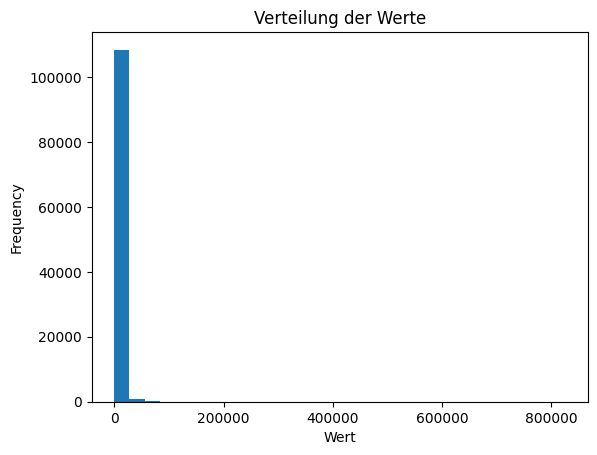

In [ ]:
# Einfaches Histogramm

df["value"].plot(kind="hist", bins=30)
plt.title("Verteilung der Werte")
plt.xlabel("Wert")
plt.show()


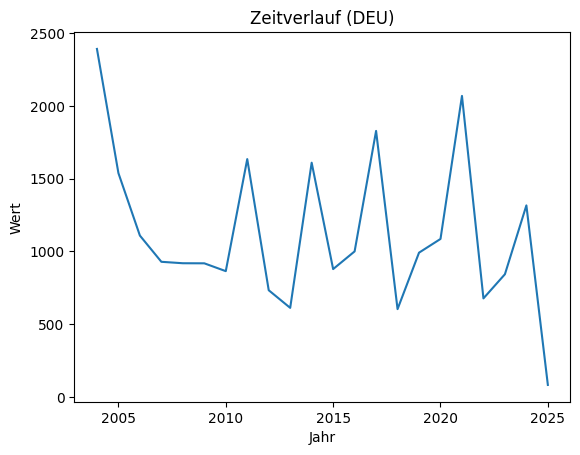

In [ ]:
# Einfacher Zeitverlauf für ein Land (Beispiel hier: Deutschland)

df[df["country"] == "DEU"].groupby("year")["value"].mean().plot()
plt.title("Zeitverlauf (DEU)")
plt.xlabel("Jahr")
plt.ylabel("Wert")
plt.show()


**Reflexion Vorlesung 1**

In dieser ersten Einheit haben wir unseren Datensatz geladen und uns Schritt für Schritt damit vertraut gemacht. Wir haben Daten eingelesen, die wichtigsten Infos abgefragt und erste kleine Bereinigungen vorgenommen, damit wir besser damit arbeiten können. Danach haben wir uns angeschaut, wie die Daten verteilt sind und wie sich Werte über die Zeit entwickeln.


Bei der Verteilung der Werte haben wir gesehen, dass die meisten Beobachtungen sehr kleine Werte haben, während ein paar extreme Ausreißer sehr große Werte aufweisen. Dadurch ist das Histogramm stark nach rechts verzerrt und die Balken konzentrieren sich fast nur im kleinen Wertebereich. Das zeigt uns: wir haben eine schiefe Verteilung mit einigen Ausreißern, typisch bei realen sozio-ökonomischen Daten.


Beim Ländervergleich über die Jahre (für Deutschland) hat sich gezeigt, dass die Werte je nach Indikator schwanken und nicht einfach linear steigen oder fallen. Das erinnert uns daran, dass Wohlbefindens-Daten von vielen Einflüssen abhängen (z.B. Wirtschaft, Krisen, soziale Faktoren) und deshalb stärker schwanken können.


Insgesamt war diese Sitzung ein guter Einstieg. Wir haben gesehen, dass man zuerst verstehen muss, wie die Daten aufgebaut sind, bevor man tiefer einsteigt. Das frühe Visualisieren hat uns geholfen, ein Gefühl für die Muster und Besonderheiten im Datensatz zu bekommen.


**Vorlesung 2: Lage, Streuung und Verteilungsform**
*Ziel: Zentrum und Streuung sauber beschreiben, Ausreißer prüfen, Verteilungen lesen*

In [ ]:
# Auswahl der Zielwerte als Serie ohne fehlende Werte

s = df["value"].dropna()
len(s), s.head()

(109706,
 0    95.782784
 1    95.782784
 2    95.782784
 3    95.782784
 4    95.782784
 Name: value, dtype: float64)

In [ ]:
# Berechnung von Lagekennzahlen: Mittelwert, Median, Modus, Quartile

mean_   = s.mean()
median_ = s.median()
mode_   = s.mode().iloc[0] if not s.mode().empty else float("nan")
q1, q2, q3 = s.quantile([0.25, 0.50, 0.75])

print("Mittelwert:", mean_)
print("Median:", median_)
print("Modus:", mode_)
print("Quartile:", {"Q1": q1, "Q2/Median": q2, "Q3": q3})


Mittelwert: 819.4623793179902
Median: 21.4
Modus: 0.0
Quartile: {'Q1': 7.478467583725, 'Q2/Median': 21.4, 'Q3': 71.00523030369999}


In [ ]:
# Berechnung eines getrimmten Mittelwerts (robust gegen Ausreißer, z.B 10%)

p = 0.10  # 10% Trim
s_sorted = s.sort_values().to_numpy()
k = int(len(s_sorted) * p)
trimmed_mean = s_sorted[k:len(s_sorted)-k].mean() if len(s_sorted) > 2*k else float("nan")
print("Getrimmter Mittelwert (10%):", trimmed_mean)


Getrimmter Mittelwert (10%): 33.47985827058104


In [ ]:
# Berechnung von Streuungsmaßen: Standardabweichung, Varianz, IQR und MAD (robust)

sd   = s.std(ddof=1)      # Stichprobe
var_ = s.var(ddof=1)
iqr  = q3 - q1
mad  = (s - median_).abs().median()
mad_sigma = 1.4826 * mad  # auf SD-Skala skaliert

print("Standardabweichung:", sd)
print("Varianz:", var_)
print("IQR:", iqr)
print("MAD:", mad, "| MAD (skaliert):", mad_sigma)


Standardabweichung: 8875.751163550343
Varianz: 78778958.71726528
IQR: 63.52676271997499
MAD: 17.831044330000005 | MAD (skaliert): 26.436306323658005


In [ ]:
# Markierung von Ausreißern mit Tukey-Regel (1.5×IQR) und modifiziertem Z-Score (über MAD)

# Tukey-Fences
lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
mask_tukey = (s < lo) | (s > hi)

# Modifizierter Z-Score (|M| > 3.5)
M = 0.6745 * (s - median_) / (mad if mad != 0 else float("nan"))
mask_modz = M.abs() > 3.5

print("Ausreißer-Kandidaten (Tukey):", int(mask_tukey.sum()))
print("Ausreißer-Kandidaten (mod. Z):", int(mask_modz.sum()))


Ausreißer-Kandidaten (Tukey): 4057
Ausreißer-Kandidaten (mod. Z): 4063


In [ ]:
# Vergleich der Kennzahlen mit und ohne Tukey-Ausreißer

s_wo = s[~mask_tukey]

print("Mit Ausreißern  → Mean/SD :", mean_, sd)
print("Ohne Ausreißer → Mean/SD :", s_wo.mean(), s_wo.std(ddof=1))

print("Mit Ausreißern  → Median/IQR :", median_, iqr)
print("Ohne Ausreißer → Median/IQR :", s_wo.median(), s_wo.quantile(.75) - s_wo.quantile(.25))


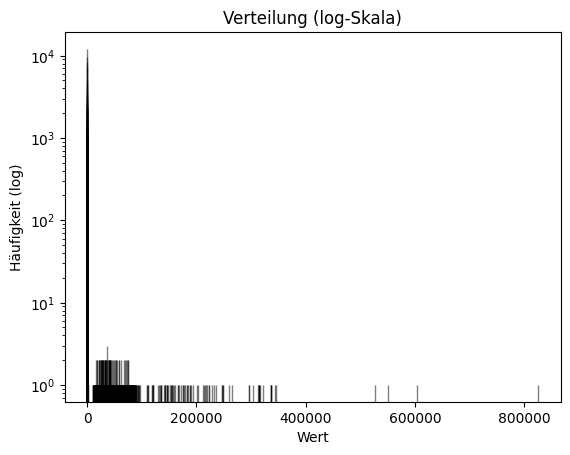

In [ ]:
# Darstellung der Verteilung mit Log-Skala, um niedrige und hohe Werte sichtbar zu machen

plt.figure()
plt.hist(s, bins="fd", edgecolor="black", alpha=0.5)
plt.yscale("log")
plt.title("Verteilung (log-Skala)")
plt.xlabel("Wert"); plt.ylabel("Häufigkeit (log)")
plt.show()


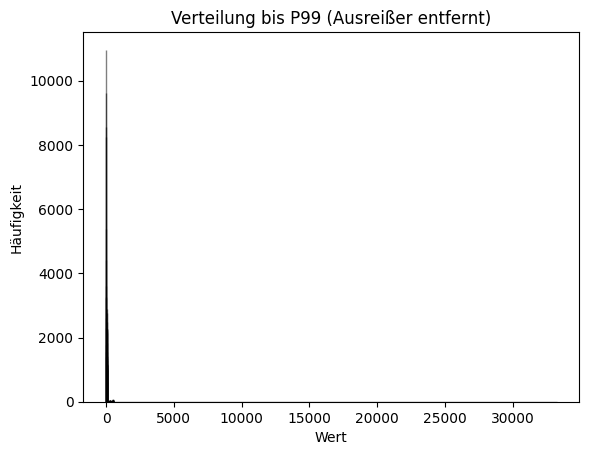

In [ ]:
# Entfernung extremer Werte (z. B. Top 1 %) und erneute Darstellung

# Grenzwert Top-1-Prozent
p99 = s.quantile(0.99)
s_zoom = s[s <= p99]

plt.figure()
plt.hist(s_zoom, bins="fd", edgecolor="black", alpha=0.5)
plt.title("Verteilung bis P99 (Ausreißer entfernt)")
plt.xlabel("Wert"); plt.ylabel("Häufigkeit")
plt.show()



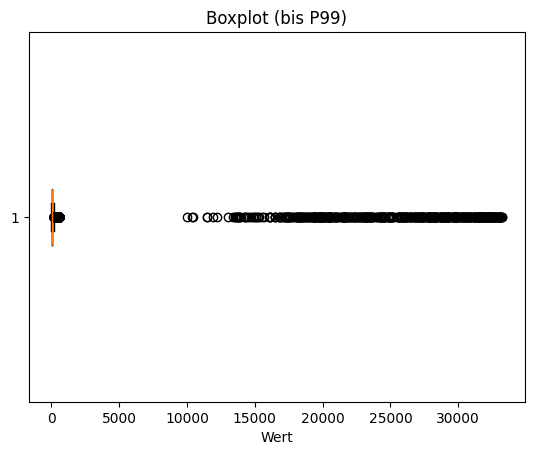

In [ ]:
# Boxplot zur Visualisierung von Median, IQR und Ausreißern

plt.figure()
plt.boxplot(s_zoom, vert=False)
plt.title("Boxplot (bis P99)")
plt.xlabel("Wert")
plt.show()


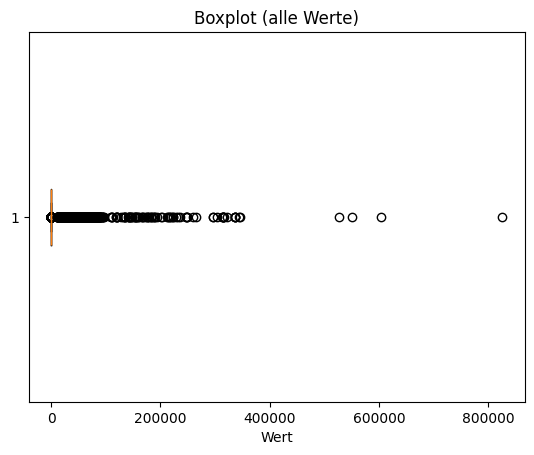

In [ ]:
# Vergleich: Boxplot mit allen Werten (zeigt extreme Ausreißer deutlich)

plt.figure()
plt.boxplot(s, vert=False)
plt.title("Boxplot (alle Werte)")
plt.xlabel("Wert")
plt.show()
